In [1]:
# Connect colab with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from timeit import default_timer as timer

#from keras.utils.np_utils import to_categorical
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print(os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification'))

/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data0.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data1.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data2.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data3.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data4.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data5.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data6.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data7.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data8.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/test.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/mean_image_gray.pickle
/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/std_gray.pickle
/content/gdrive/

In [3]:
# Opening file for reading in binary mode
with open('/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type, latin1 for data loss

print('<Before tranpose>')

# Showing loaded data from file
for i, j in data.items(): # i=key, j=value
    if i == 'labels':
        print(i + ':', len(j))
    else:
        print(i + ':', j.shape)

print(" ")
print('<Before tranpose key: x_train>')
print(data['x_train'][0])

<Before tranpose>
y_test: (12630,)
y_validation: (4410,)
x_validation: (4410, 3, 32, 32)
x_train: (86989, 3, 32, 32)
y_train: (86989,)
labels: 43
x_test: (12630, 3, 32, 32)
 
<Before tranpose key: x_train>
[[[-0.11269261  0.04715557  0.00952698 ... -0.13735995 -0.13143685
   -0.12326874]
  [-0.12810317  0.00462329 -0.02056789 ... -0.05274366 -0.05008753
   -0.05357172]
  [-0.14521343 -0.02469198 -0.05040632 ... -0.08287229 -0.09214278
   -0.08606344]
  ...
  [-0.03504007 -0.0393879  -0.05041799 ... -0.00053591  0.02857639
   -0.09111992]
  [-0.00545359 -0.02211399 -0.02911592 ...  0.02651708  0.05216435
   -0.08327351]
  [-0.09819582 -0.11141177 -0.12326741 ...  0.05088206  0.07386984
   -0.06559517]]

 [[-0.11324657  0.03585802 -0.00445202 ... -0.13911372 -0.13018866
   -0.11914465]
  [-0.13181826 -0.01352955 -0.04135418 ... -0.06522582 -0.05587178
   -0.05266719]
  [-0.14787507 -0.04565987 -0.07002868 ... -0.0986519  -0.1012319
   -0.09616467]
  ...
  [-0.0287146  -0.03192247 -0.0417

In [4]:
import tensorflow as tf

In [5]:
# Preparing y_train and y_validation for using in Keras
data['y_train'] = tf.keras.utils.to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = tf.keras.utils.to_categorical(data['y_validation'], num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

print('<After tranpose>')

# Showing loaded data from file
for i, j in data.items(): # i=key, j=value
    if i == 'labels':
        print(i + ':', len(j))
    else:
        print(i + ':', j.shape)

print(" ")
print('<After tranpose key: x_train>')
print(data['x_train'][0])

<After tranpose>
y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)
 
<After tranpose key: x_train>
[[[-0.11269261 -0.11324657 -0.11641745]
  [ 0.04715557  0.03585802  0.01729965]
  [ 0.00952698 -0.00445202 -0.03071466]
  ...
  [-0.13735995 -0.13911372 -0.13720345]
  [-0.13143685 -0.13018866 -0.12873769]
  [-0.12326874 -0.11914465 -0.12212406]]

 [[-0.12810317 -0.13181826 -0.13472849]
  [ 0.00462329 -0.01352955 -0.03189032]
  [-0.02056789 -0.04135418 -0.06338874]
  ...
  [-0.05274366 -0.06522582 -0.0667554 ]
  [-0.05008753 -0.05587178 -0.05785519]
  [-0.05357172 -0.05266719 -0.06299827]]

 [[-0.14521343 -0.14787507 -0.1544973 ]
  [-0.02469198 -0.04565987 -0.06364641]
  [-0.05040632 -0.07002868 -0.09550436]
  ...
  [-0.08287229 -0.0986519  -0.09981053]
  [-0.09214278 -0.1012319  -0.11060425]
  [-0.08606344 -0.09616467 -0.10985101]]

 ...

 [[-0.03504007 -0.0287146  -0.05660964]


(81, 32, 32, 3)


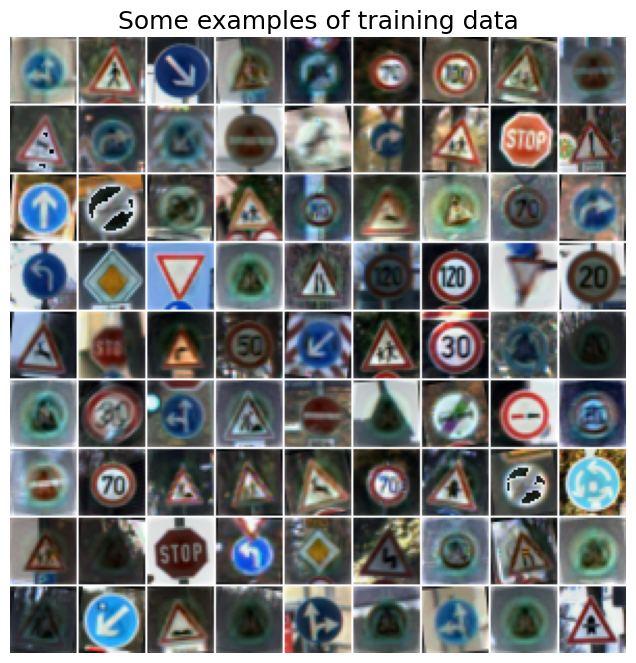

In [6]:
%matplotlib inline
#return Rich output(image, sound, animation... ect)

def convert_to_grid(x_input):
    N, H, W, C = x_input.shape #Number of data
    grid_size = int(np.ceil(np.sqrt(N))) # as formula
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    # fill the grid data
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low) # normalize 0~225
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid
# Visualizing some examples of training data
examples = data['x_train'][:81, :, :, :]
print(examples.shape)

# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(8, 8)
plt.title('Some examples of training data', fontsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('training_examples.png')
plt.close()

In [7]:
model = Sequential() # Generate in the order given
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## Overfitting Checking

In [8]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 70

h = model.fit(data['x_train'][:10], data['y_train'][:10],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Epoch 1/70
2/2 [==============================] - 10s 6s/step - loss: 3.7421 - accuracy: 0.0000e+00 - val_loss: 3.7749 - val_accuracy: 0.0086 - lr: 2.7584e-05
Epoch 2/70
2/2 [==============================] - 3s 3s/step - loss: 3.6770 - accuracy: 0.2000 - val_loss: 3.7751 - val_accuracy: 0.0116 - lr: 2.6205e-05
Epoch 3/70
2/2 [==============================] - 3s 3s/step - loss: 3.6058 - accuracy: 0.4000 - val_loss: 3.7759 - val_accuracy: 0.0175 - lr: 2.4894e-05
Epoch 4/70
2/2 [==============================] - 2s 2s/step - loss: 3.5556 - accuracy: 0.4000 - val_loss: 3.7765 - val_accuracy: 0.0306 - lr: 2.3650e-05
Epoch 5/70
2/2 [==============================] - 1s 1s/step - loss: 3.5034 - accuracy: 0.4000 - val_loss: 3.7778 - val_accuracy: 0.0367 - lr: 2.2467e-05
Epoch 6/70
2/2 [==============================] - 3s 3s/step - loss: 3.4624 - accuracy: 0.4000 - val_loss: 3.7790 - val_accuracy: 0.0388 - lr: 2.1344e-05
Epoch 7/70
2/2 [==============================] - 3s 3s/step - loss: 3.

In [9]:
print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epochs=70, training accuracy=0.70000, validation accuracy=0.03923


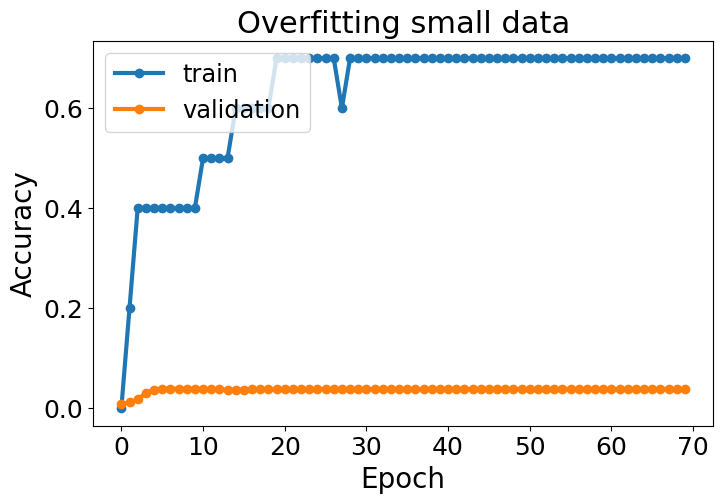

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('Overfitting small data', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('overfitting_small_data.png')
plt.close()


In [ ]:
##With Different Filter

In [11]:
filters = [3, 5, 9, 13, 15, 19, 23, 25, 31]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
##[Training set of models of CNN with Keras]

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'], data['y_train'],
                        batch_size=1, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)

    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

Model with filters 3x3, epochs=5, training accuracy=0.98134, validation accuracy=0.85397
Model with filters 5x5, epochs=5, training accuracy=0.97845, validation accuracy=0.85669
Model with filters 9x9, epochs=5, training accuracy=0.96554, validation accuracy=0.82925
Model with filters 13x13, epochs=5, training accuracy=0.93812, validation accuracy=0.80658
Model with filters 15x15, epochs=5, training accuracy=0.92351, validation accuracy=0.78912
Model with filters 19x19, epochs=5, training accuracy=0.85229, validation accuracy=0.70522
Model with filters 23x23, epochs=5, training accuracy=0.80462, validation accuracy=0.68957
Model with filters 25x25, epochs=5, training accuracy=0.64071, validation accuracy=0.54150


In [2]:
## Plotting comparison results for accuracy

NameError: ignored

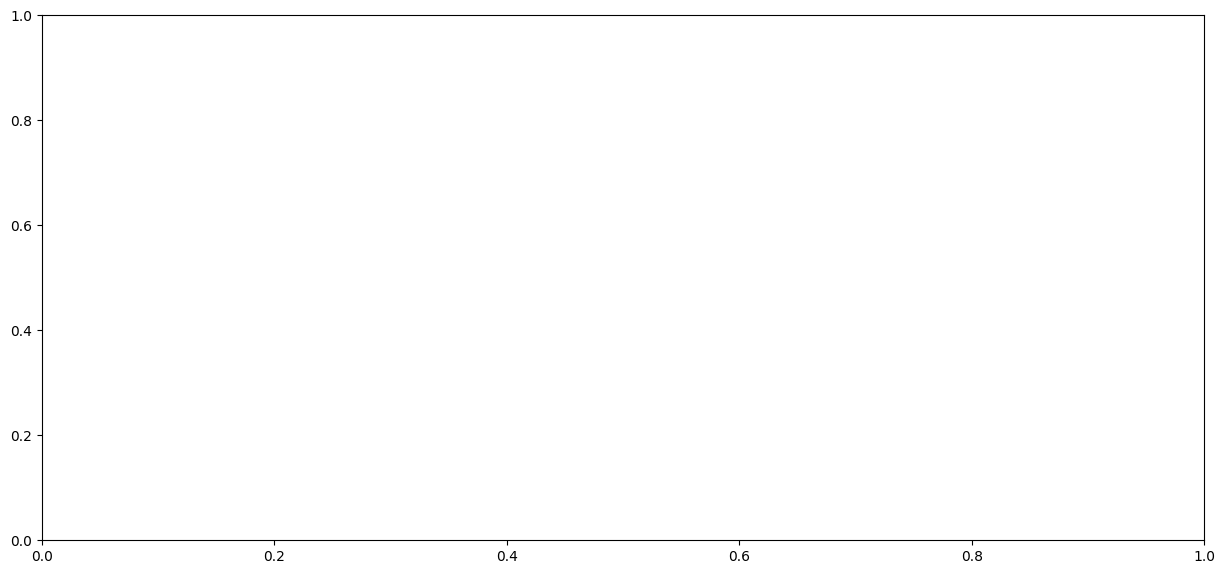

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

# Plotting history of training accuracy
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h[8].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[7].history['accuracy'], '-s', linewidth=3.0)
plt.plot(h[6].history['accuracy'], '-D', linewidth=3.0)
plt.plot(h[5].history['accuracy'], '-D', linewidth=3.0)
plt.plot(h[4].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 31', 'filter 25', 'filter 23', 'filter 19', 'filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  # {"linear", "log", "symlog", "logit", ...}
plt.ylim(0.85, 1.0)
plt.xlim(0.5, 5.3)
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(2, 1, 2)
# plt.gca().set_title('Validation accuracy')
plt.plot(h[8].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[7].history['val_accuracy'], '-s', linewidth=3.0)
plt.plot(h[6].history['val_accuracy'], '-D', linewidth=3.0)
plt.plot(h[5].history['val_accuracy'], '-D', linewidth=3.0)
plt.plot(h[4].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 31', 'filter 25', 'filter 23', 'filter 19', 'filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  # {"linear", "log", "symlog", "logit", ...}
plt.ylim(0.75, 0.9)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('models_accuracy.png')
plt.close()


# Showing values of accuracy for different filters
for i in range(len(h)):
    print('data2 filter {0:d} training accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['accuracy'])))

print()

for i in range(len(h)):
    print('data2 filter {0:d} validation accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['val_accuracy'])))

In [6]:
##Calculating accuracy with testing dataset

In [ ]:
 ##Let's classification

In [ ]:
## Visualizing filters of convolutional layer

(3, 3, 3, 32)
(32, 3, 3, 3)


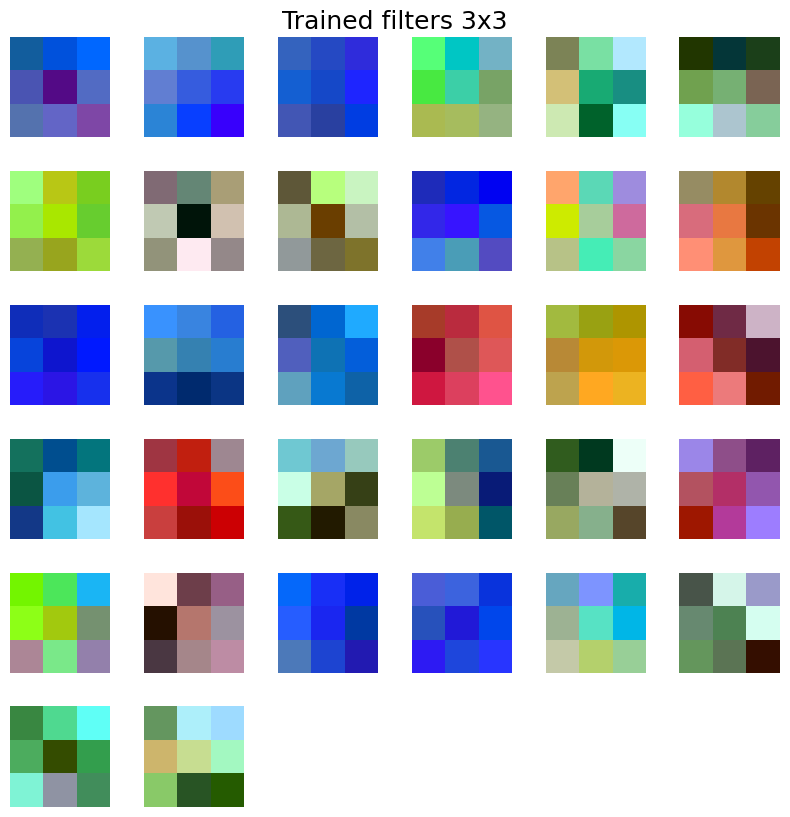

(5, 5, 3, 32)
(32, 5, 5, 3)


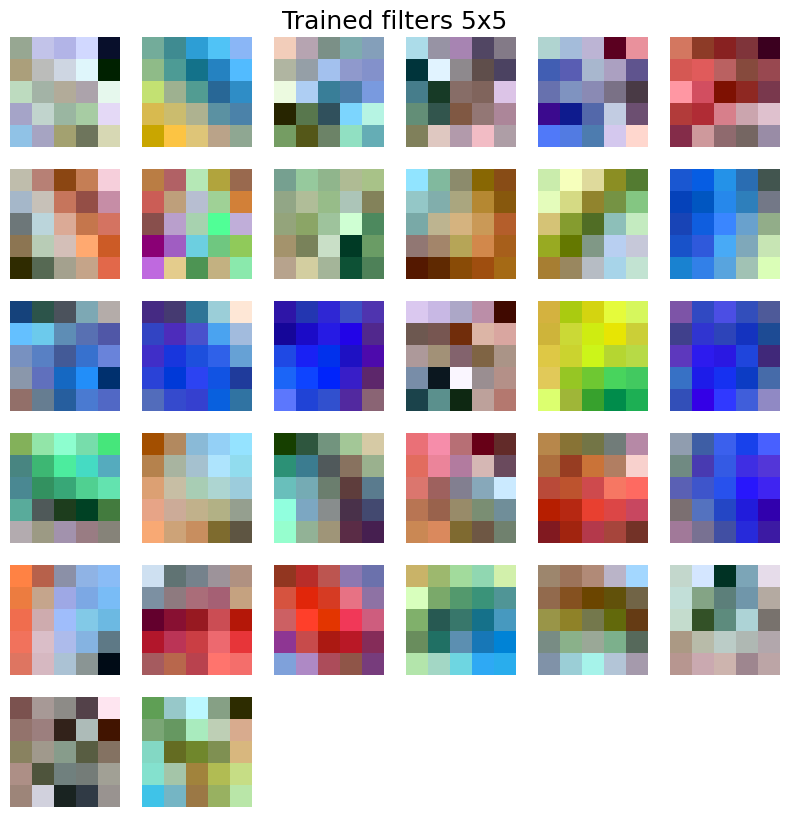

(9, 9, 3, 32)
(32, 9, 9, 3)


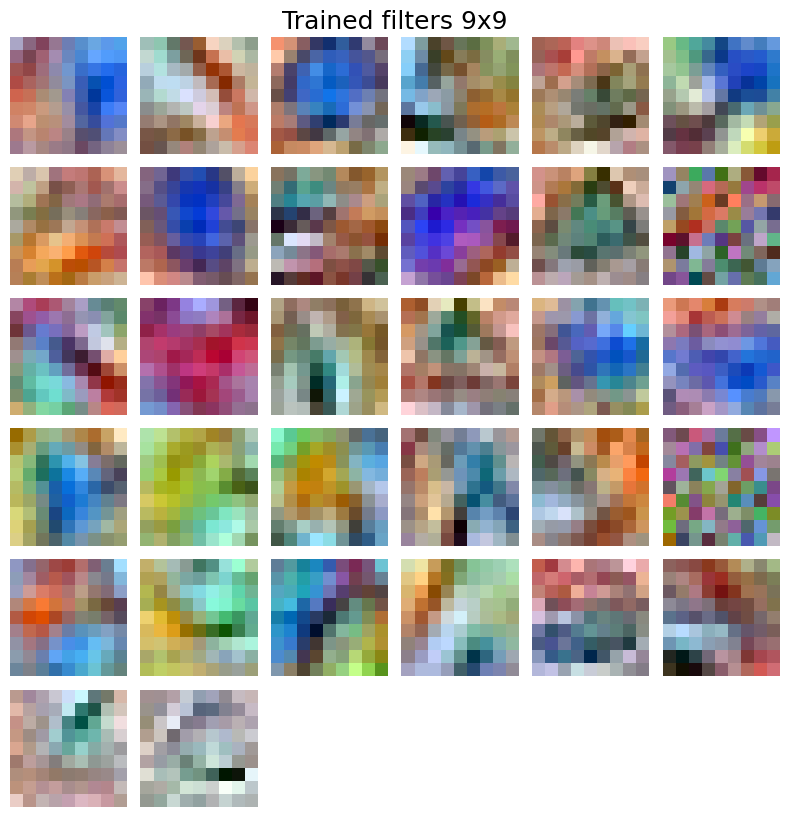

(13, 13, 3, 32)
(32, 13, 13, 3)


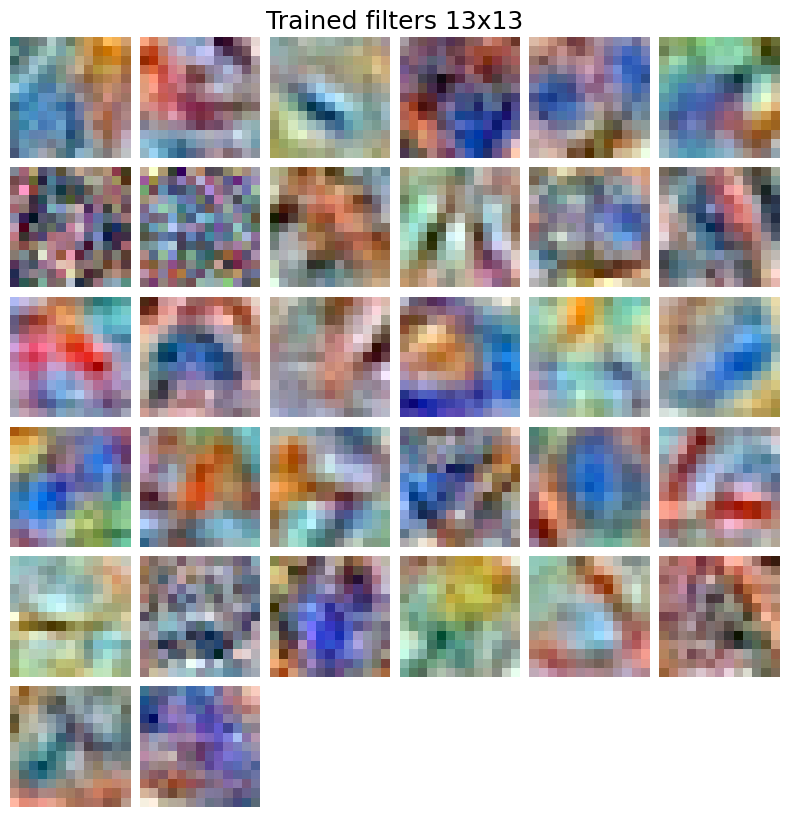

(15, 15, 3, 32)
(32, 15, 15, 3)


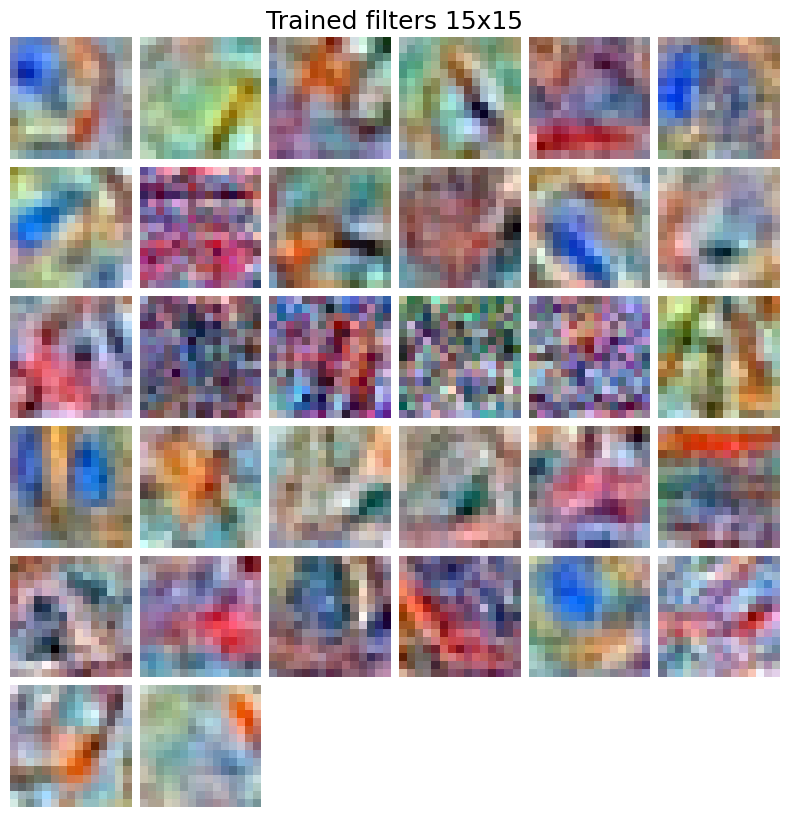

(19, 19, 3, 32)
(32, 19, 19, 3)


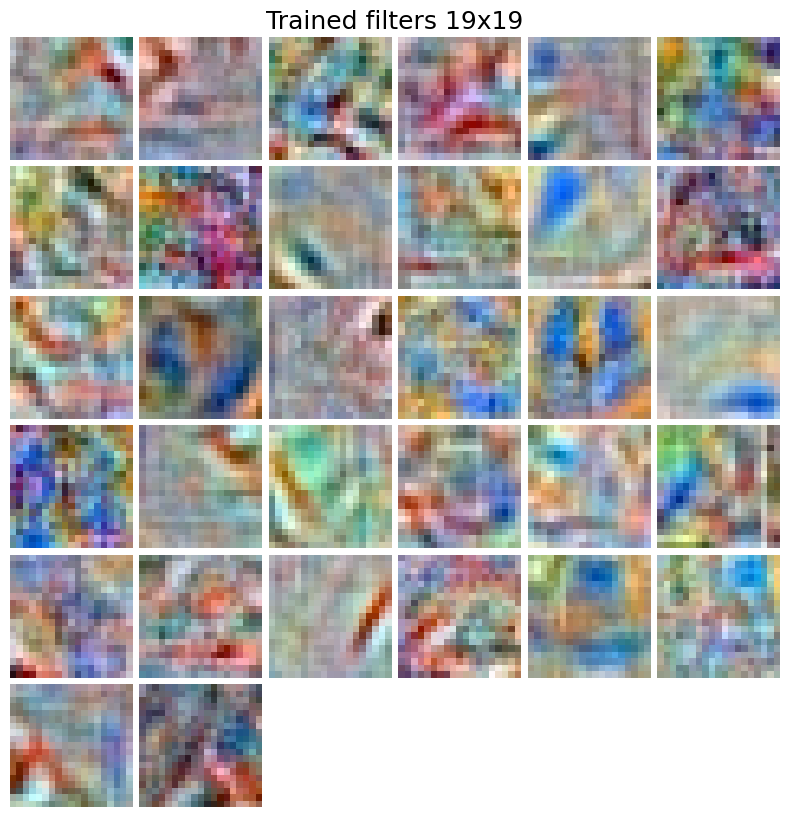

(23, 23, 3, 32)
(32, 23, 23, 3)


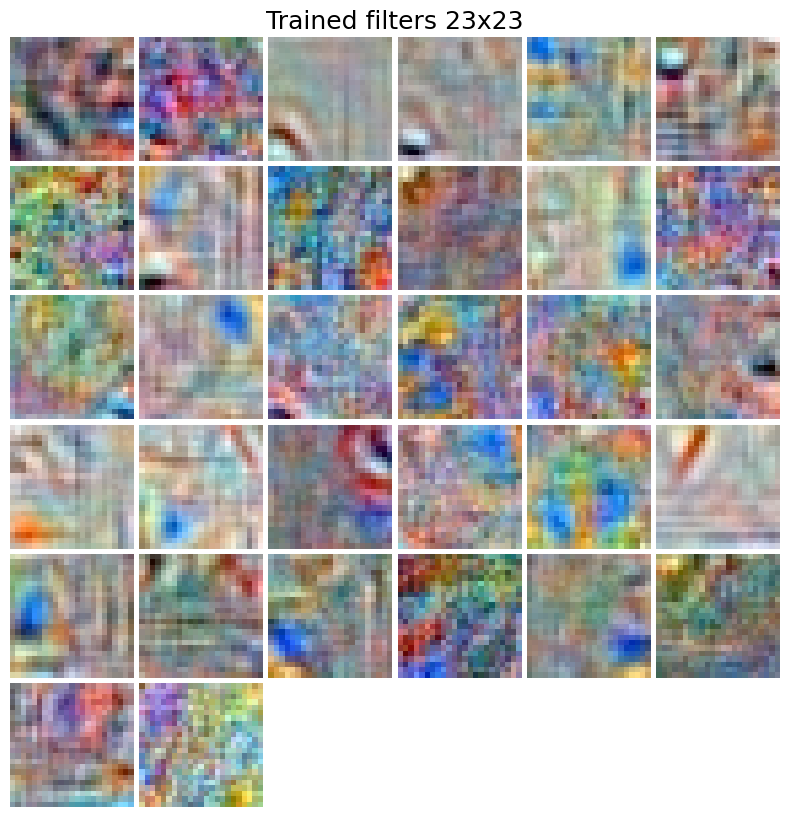

(25, 25, 3, 32)
(32, 25, 25, 3)


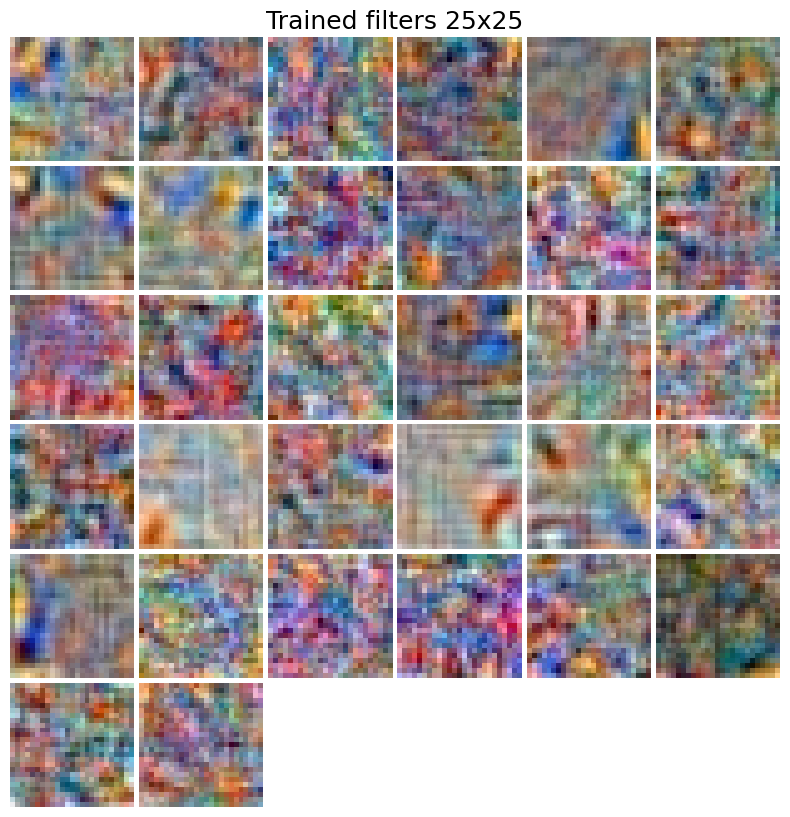

(31, 31, 3, 32)
(32, 31, 31, 3)


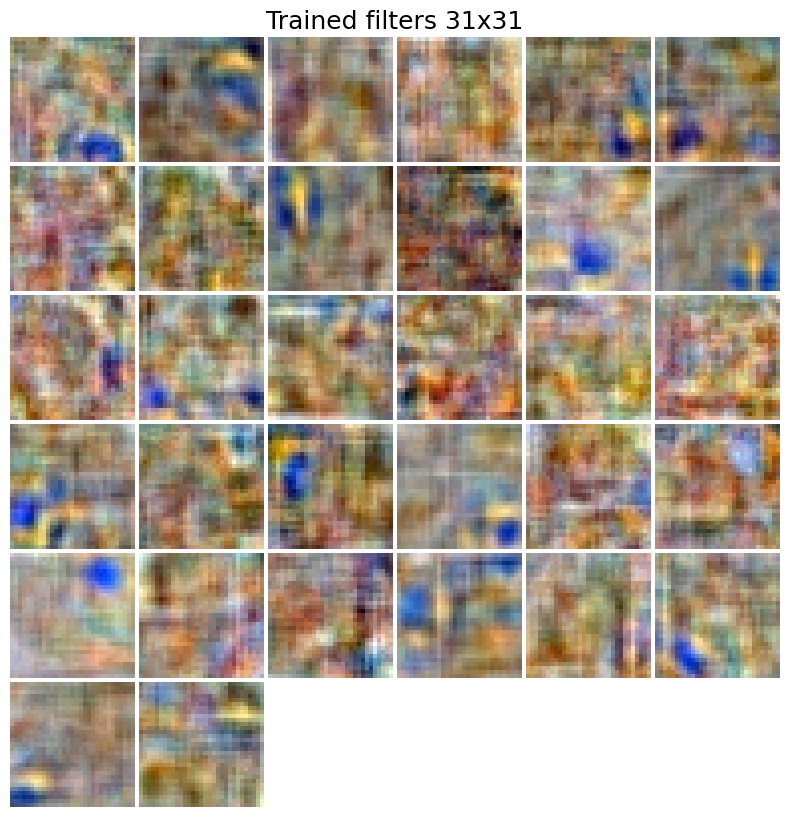

In [ ]:
for i in range(len(model)):
    w = model[i].get_weights()
    print(w[0].shape)
    # print(model[i].get_config())
    # l = model[i].layers
    # print(l[0].get_weights()[0].shape)

    # Visualizing filters
    temp = w[0].transpose(3, 0, 1, 2)
    print(temp.shape)  # (81, 32, 32, 3)

    # Plotting
    fig = plt.figure()
    grid = convert_to_grid(temp)
    plt.imshow(grid.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    name = 'Trained filters ' + str(filters[i]) + 'x' + str(filters[i])
    plt.title(name, fontsize=18)

    # Showing the plot
    plt.show()

    # Saving the plot
    name = 'filters-' + str(filters[i]) + 'x' + str(filters[i]) + '.png'
    fig.savefig(name)
    plt.close()

In [ ]:
##Predicting with one image from test dataset

(1, 32, 32, 3)
[3]


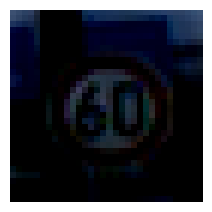

1/1 [==============================] - 0s 47ms/step
(43,)
ClassId: 5
Label: Speed limit (80km/h)


In [ ]:
%matplotlib inline

# Preparing image for predicting from test dataset
x_input = data['x_test'][100:101]
print(x_input.shape)
y_input = data['y_test'][100:101]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) # Setting default size of plots
plt.imshow(x_input[0, :, :, :])
plt.axis('off')

# Showing the plot
plt.show()

# Getting scores from forward pass of input image
scores = model[0].predict(x_input)
print(scores[0].shape) # (43,)

# Scores is given for image with 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)
print('ClassId:', prediction)

# Defining function for getting texts for every class - labels
def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []

    # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)

    # Returning resulted list with labels
    return label_list


# Getting labels
labels = label_text('/content/gdrive/MyDrive/Colab Notebooks/Traffic sign classification/label_names.csv')

# Printing label for classified Traffic Sign
print('Label:', labels[prediction])